In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('matches.csv')

In [3]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
mat= df.loc[df['season']==2008]
mat.shape[0]

58

In [5]:
df['city']=df['city'].str.strip()
df=df.replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [6]:
df['city'].value_counts().nlargest(1)

Mumbai    101
Name: city, dtype: int64

In [7]:
df['city'].value_counts().nsmallest(1)

Bloemfontein    2
Name: city, dtype: int64

In [8]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [9]:
df['toss_winner'].value_counts().nlargest(1)

Mumbai Indians    98
Name: toss_winner, dtype: int64

In [10]:
df['toss_winner'].value_counts().nsmallest(1)

Kochi Tuskers Kerala    8
Name: toss_winner, dtype: int64

In [11]:
df['toss_decision'].loc[df['toss_winner']=='Mumbai Indians'].value_counts()

field    54
bat      44
Name: toss_decision, dtype: int64

In [12]:
df['toss_decision'].loc[df['toss_winner']=='Kochi Tuskers Kerala'].value_counts()

field    5
bat      3
Name: toss_decision, dtype: int64

In [13]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [14]:
df[['team1','team2']].loc[df['result']=='tie']

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab
705,Kolkata Knight Riders,Delhi Capitals
746,Mumbai Indians,Sunrisers Hyderabad


In [15]:
df[['winner','win_by_runs']].loc[df['win_by_runs']==df['win_by_runs'].max()]

,winner,win_by_runs
43,Mumbai Indians,146


In [16]:
x=df.loc[df['win_by_runs']>0]
x[['winner','win_by_runs']].loc[x['win_by_runs']==x['win_by_runs'].min()]

,winner,win_by_runs
58,Mumbai Indians,1
105,Kings XI Punjab,1
163,Kings XI Punjab,1
344,Delhi Daredevils,1
350,Mumbai Indians,1
518,Chennai Super Kings,1
598,Gujarat Lions,1
614,Royal Challengers Bangalore,1
734,Royal Challengers Bangalore,1
755,Mumbai Indians,1


In [17]:
df['player_of_match'].value_counts()[df['player_of_match'].value_counts()>3]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
SK Warne           4
CA Lynn            4
SS Iyer            4
ML Hayden          4
KH Pandya          4
Name: player_of_match, Length: 65, dtype: int64

In [18]:
df['player_of_match'].value_counts().nlargest(1)

CH Gayle    21
Name: player_of_match, dtype: int64

In [19]:
df['venue'].loc[df['win_by_runs']==df['win_by_runs'].max()]

43    Feroz Shah Kotla
Name: venue, dtype: object

In [20]:
x['venue'].loc[x['win_by_runs']==x['win_by_runs'].min()]

58             Rajiv Gandhi International Stadium, Uppal
105                                     Wankhede Stadium
163                                New Wanderers Stadium
344                                     Feroz Shah Kotla
350                           Subrata Roy Sahara Stadium
518                      MA Chidambaram Stadium, Chepauk
598                                     Feroz Shah Kotla
614    Punjab Cricket Association IS Bindra Stadium, ...
734                               M. Chinnaswamy Stadium
755                   Rajiv Gandhi Intl. Cricket Stadium
Name: venue, dtype: object

In [21]:
df[['umpire1','umpire2']].value_counts().nlargest(1)

umpire1  umpire2  
S Ravi   RJ Tucker    12
dtype: int64

In [22]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [23]:
df1=pd.read_csv('deliveries.csv')

In [24]:
dfn=pd.merge(df,df1,left_on='id',right_on='match_id')
dfn=dfn.replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [25]:
dfn.groupby('season')['total_runs'].sum()

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    20706
2019    20270
Name: total_runs, dtype: int64

In [26]:
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

<AxesSubplot:xlabel='season'>

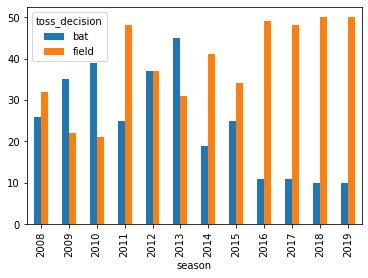

In [27]:
pd.crosstab(df['season'],df['toss_decision']).plot(kind='bar')

In [28]:
dfn['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

<AxesSubplot:>

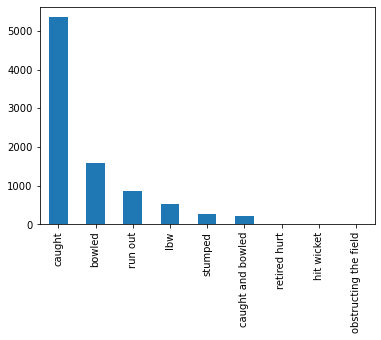

In [29]:
dfn['dismissal_kind'].value_counts().plot(kind='bar')

In [30]:
dfn.groupby('batsman')['batsman_runs'].sum().nlargest(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

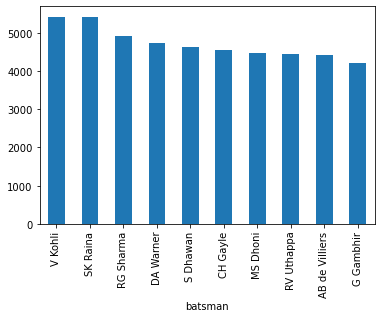

In [31]:
dfn.groupby('batsman')['batsman_runs'].sum().nlargest(10).plot(kind='bar')

<AxesSubplot:>

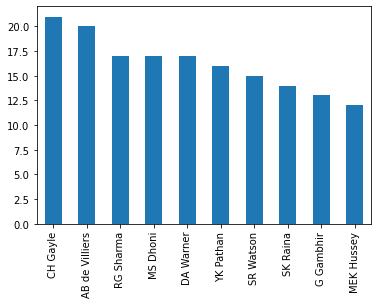

In [32]:
df['player_of_match'].value_counts().nlargest(10).plot(kind='bar')

In [33]:
total_mat=df['team1'].value_counts()+df['team2'].value_counts()
total_mat

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiants         30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [34]:
won_mat=df['winner'].value_counts()
won_mat

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [35]:
win_rate=won_mat/total_mat
win_rate

Chennai Super Kings            0.609756
Deccan Chargers                0.386667
Delhi Capitals                 0.625000
Delhi Daredevils               0.416149
Gujarat Lions                  0.433333
Kings XI Punjab                0.465909
Kochi Tuskers Kerala           0.428571
Kolkata Knight Riders          0.516854
Mumbai Indians                 0.582888
Pune Warriors                  0.260870
Rajasthan Royals               0.510204
Rising Pune Supergiants        0.500000
Royal Challengers Bangalore    0.466667
Sunrisers Hyderabad            0.537037
dtype: float64

<AxesSubplot:>

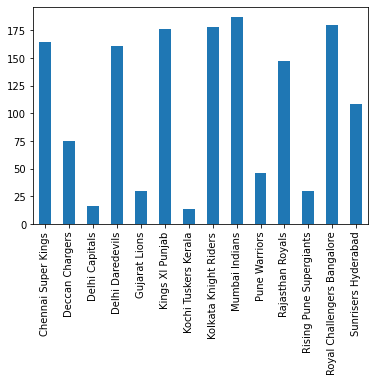

In [52]:
total_mat.plot(kind='bar')

<AxesSubplot:>

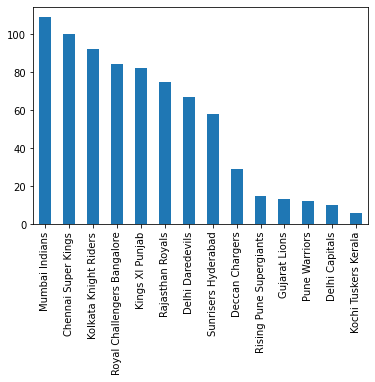

In [36]:
won_mat.plot(kind='bar')

<AxesSubplot:>

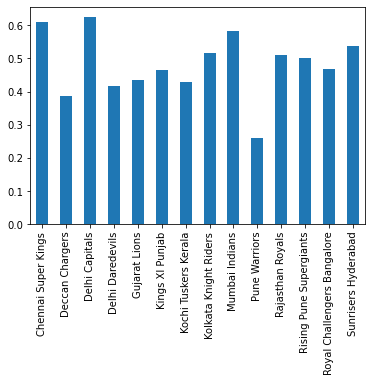

In [53]:
win_rate.plot(kind='bar')

In [45]:
total_mat/won_mat

Chennai Super Kings            1.640000
Deccan Chargers                2.586207
Delhi Capitals                 1.600000
Delhi Daredevils               2.402985
Gujarat Lions                  2.307692
Kings XI Punjab                2.146341
Kochi Tuskers Kerala           2.333333
Kolkata Knight Riders          1.934783
Mumbai Indians                 1.715596
Pune Warriors                  3.833333
Rajasthan Royals               1.960000
Rising Pune Supergiants        2.000000
Royal Challengers Bangalore    2.142857
Sunrisers Hyderabad            1.862069
dtype: float64

In [37]:
pd.crosstab(df['toss_winner'],df['toss_decision'])

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,2,8
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,26,55
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,62
Mumbai Indians,44,54
